In [10]:
import os
#import h5py
import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.append(os.path.dirname(os.getcwd()))
from mayavi import mlab as mlab


In [11]:
def make_dir_safely(dirname):
    # directory = os.path.dirname(dirname)
    if not os.path.exists(dirname):
        os.makedirs(dirname)

In [12]:
basepath_path = '/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/CNN-segmentation/logdir/inference_results'

experiments = os.listdir(basepath_path)
print(experiments)

['unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_True_full_run_bern_32_slices_fine_tuning_lr_1e-3', 'unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_True_full_run_bern_full_fine_tuning_lr_1e-3', 'unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_False_full_run_bern_only_w_labels', 'unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_3_full_run', 'unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_False_full_run_finetune_lr_1e-3_e20_AdamW_bern_only_w_labels_FG_DICE', 'unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_False_full_run_finetune_lr_1e-3_AdamW_e40_bern_all_FG_DICE', 'unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_False_full_run_adaptive_batch_norm_lr_1e-3_e20_bern_all', 'unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_False_full_run_adaptive_batch_norm_lr_1e-3_e100_bern_only_w_labels', 'unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_False_full_run_adaptive_batch_norm_lr_scheduler_AdamW_e50_bern_32_train_val_FG_DICE', 'unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_False_full_run_only_w_labels_adaptative_batch_norm_lr_1e-3_e20', 'un

In [16]:
experiment_name = experiments[18]
print(experiment_name)
results_path = os.path.join(basepath_path, experiment_name)

unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_False_full_run_only_w_labels_adaptive_batch_norm_lr_1e-4_e75_tr_27


In [17]:
save_images_path = os.path.join(results_path, 'images')
make_dir_safely(save_images_path)

In [18]:
save_images_path

'/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/CNN-segmentation/logdir/inference_results/unet3d_da_0.0nchannels4_r1_loss_dice_cut_z_False_full_run_only_w_labels_adaptive_batch_norm_lr_1e-4_e75_tr_27/images'

In [19]:
class_results_files = []
class_results_paths = []
for class_label in ['controls', 'patients']:
    try:
        for file in os.listdir(os.path.join(results_path, class_label)):
            if file.endswith('.npy'):
                class_results_files.append(file)
                class_results_paths.append(os.path.join(results_path, class_label, file))
    except:
        pass
    
    

    
    
print(class_results_files)

['MACDAVD_107__seg_cnn.npy', 'MACDAVD_108__seg_cnn.npy', 'MACDAVD_150__seg_cnn.npy', 'MACDAVD_154__seg_cnn.npy', 'MACDAVD_111__seg_cnn.npy', 'MACDAVD_113__seg_cnn.npy', 'MACDAVD_114__seg_cnn.npy', 'MACDAVD_115__seg_cnn.npy', 'MACDAVD_121__seg_cnn.npy', 'MACDAVD_123__seg_cnn.npy', 'MACDAVD_125__seg_cnn.npy', 'MACDAVD_128__seg_cnn.npy', 'MACDAVD_130__seg_cnn.npy', 'MACDAVD_131__seg_cnn.npy', 'MACDAVD_133__seg_cnn.npy', 'MACDAVD_136__seg_cnn.npy', 'MACDAVD_138__seg_cnn.npy', 'MACDAVD_112__seg_cnn.npy', 'MACDAVD_139__seg_cnn.npy', 'MACDAVD_140__seg_cnn.npy', 'MACDAVD_141__seg_cnn.npy', 'MACDAVD_143__seg_cnn.npy', 'MACDAVD_144__seg_cnn.npy', 'MACDAVD_155__seg_cnn.npy', 'MACDAVD_147__seg_cnn.npy', 'MACDAVD_149__seg_cnn.npy', 'MACDAVD_151__seg_cnn.npy', 'MACDAVD_153__seg_cnn.npy']


In [80]:
n = 28
patient_n =class_results_files[n]
print(patient_n)
patient_name = patient_n.split('__')[0]
print(patient_name)

IndexError: list index out of range

In [79]:
seg = np.load(class_results_paths[n], allow_pickle=True)

azimuth = 270
elevation = 220
distance= 300
focalpoint = (80,70,10)


mlab.figure()
mlab.contour3d(seg[...,0], colormap = 'gray')
#mlab.contour3d(seg_mask[...,0,0], colormap = 'gray')
#mlab.contour3d(mask[64:125], colormap = 'gray')
mlab.axes(xlabel='X', ylabel='Y', zlabel='Z') #Display axis
mlab.orientation_axes()
mlab.view(azimuth=azimuth, elevation=elevation, distance=distance, focalpoint = focalpoint)
mlab.savefig(os.path.join(save_images_path,f'{patient_name}_seg_3d.png'))

mlab.show()

In [81]:
image_list = os.listdir(save_images_path)
image_list.sort()
n_images = len(image_list)
print('n_images', n_images)

n_images 28


IndexError: index 5 is out of bounds for axis 0 with size 5

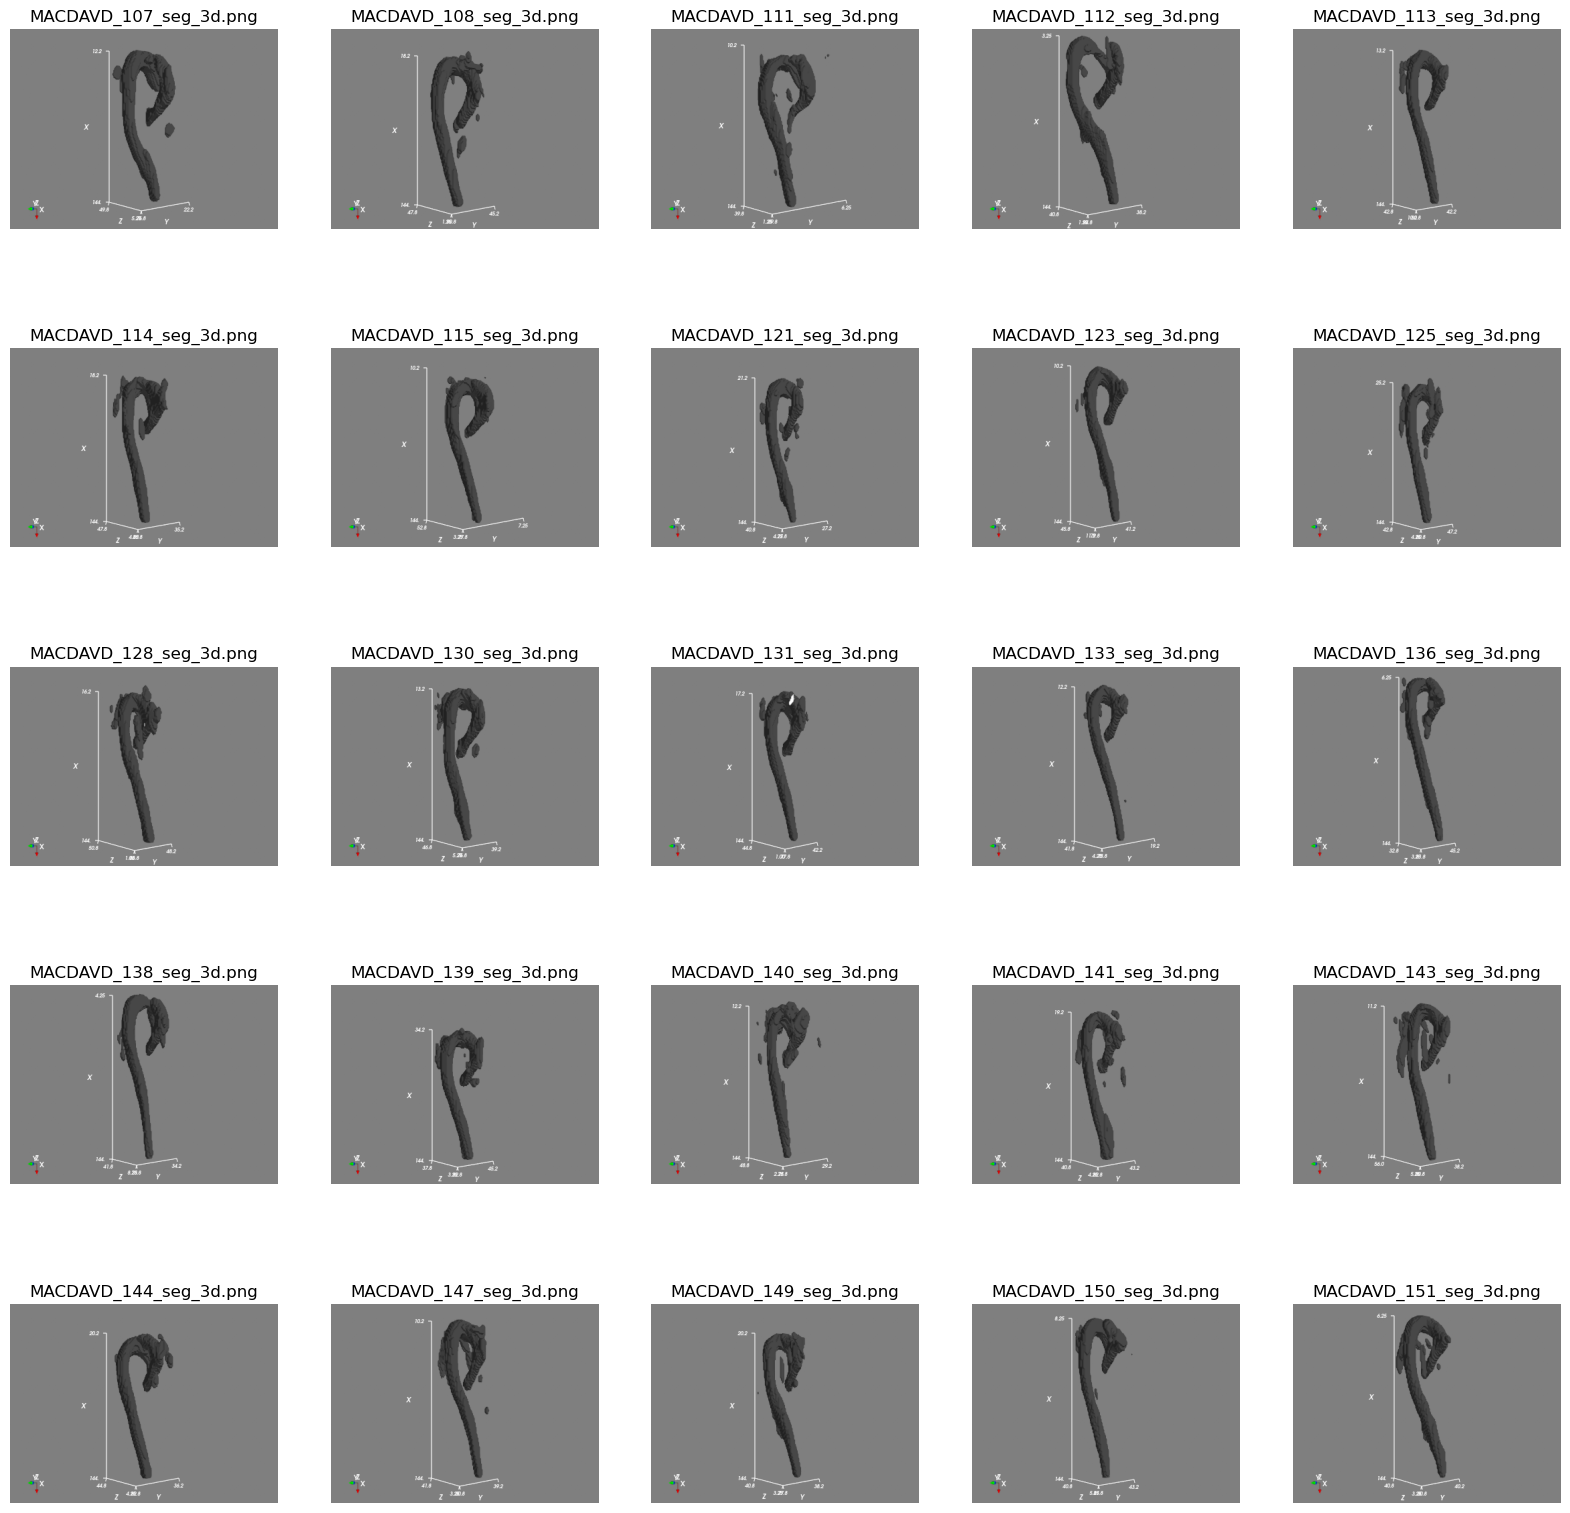

: 

In [82]:


fig, ax = plt.subplots(np.round(np.sqrt(n_images)).astype(int), np.round(np.sqrt(n_images)).astype(int), figsize=(20,20))
for i, file in enumerate(image_list):
    img = plt.imread(os.path.join(save_images_path, file))
    ax[i//np.round(np.sqrt(n_images)).astype(int), i%np.round(np.sqrt(n_images)).astype(int)].imshow(img)
    ax[i//np.round(np.sqrt(n_images)).astype(int), i%np.round(np.sqrt(n_images)).astype(int)].set_title(file)
    ax[i//np.round(np.sqrt(n_images)).astype(int), i%np.round(np.sqrt(n_images)).astype(int)].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(os.path.join(results_path, 'all_images.png'))


In [71]:
#seg = np.load('/usr/bmicnas02/data-biwi-01/jeremy_students/data/inselspital/kady/segmenter_rw_pw_hard/controls/seg_MACDAVD_105_.npy')


In [38]:
seg_32 = seg.copy()

In [149]:
azimuth = 180
elevation = 220
distance= 300
focalpoint = (0,70,10)


mlab.figure()
mlab.contour3d(seg_32[...,0], colormap = 'gray')
#mlab.contour3d(seg_mask[...,0,0], colormap = 'gray')
#mlab.contour3d(mask[64:125], colormap = 'gray')
mlab.axes(xlabel='X', ylabel='Y', zlabel='Z') #Display axis
mlab.orientation_axes()
mlab.view(azimuth=azimuth, elevation=elevation, distance=distance, focalpoint = focalpoint)
#mlab.savefig(os.path.join(save_images_path,f'{patient_name}_seg_3d.png'))

mlab.show()